In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk",
                rc={
                    "font.size": 15,
                    "axes.titlesize": 15,
                    "axes.labelsize": 15
                })
from matplotlib import style
style.use('ggplot')

In [10]:
# data preprocessing
from sklearn.preprocessing import StandardScaler

# pca using sklearn decomposition
from sklearn.decomposition import PCA

In [11]:
df = pd.read_excel("Insert File path.xlsx",                          
                     sheet_name='Insert sheetname', 
)
df.head()

,Stock,Average Speed,Average Speed(N),Step Frequency,Swing Speed(AVR),Step Length(AVR),Swing Duration(AVR),Stance Duration(AVR),Stance Linearity,AEP Footprint Clustering,PEP Footprint Clustering,Body displacement ratio,Tripod Index,Tetrapod Index,Non-canonical configuration,Wave Index
0,Water 1 week,37.4343,4.539095,1.114032,-1.927569,-268.409631,-0.002219,-0.003332,-4.981648,0.001889,0.011948,-0.005364,-0.034532,0.005489,0.054941,-0.025898
1,Water 1 week,36.7915,3.896295,2.007121,1.705716,-283.640980,-0.004716,-0.003856,-1.499242,0.001622,0.002160,0.003426,-0.051596,0.087690,-0.071226,0.035132
2,Water 1 week,41.4705,8.575295,1.115177,-1.194019,-217.494601,-0.001961,-0.002981,-4.211188,-0.004552,-0.013982,0.005812,-0.012615,0.021804,-0.003009,-0.006180
3,Water 1 week,29.8087,-3.086505,1.652091,-1.154171,-270.094166,-0.003945,-0.004587,-5.464777,0.000782,0.003557,-0.000991,-0.059575,0.039904,0.040921,-0.021250
4,Water 1 week,40.7812,7.885995,2.078246,1.815722,-259.578517,-0.003973,-0.004041,3.575086,0.004632,0.001470,-0.008114,0.003973,0.003540,-0.035308,0.027795


In [12]:
labels = df['Stock']
num_samples = labels.size
print ('Number of samples: ', num_samples)
labels_unique = labels.unique()
print ('label unique values: ', labels_unique)
print ('num. of classes: ', labels_unique.size)

Number of samples:  80
label unique values:  ['Water 1 week' 'Water 3 weeks' '0.5 mM 1 week' '0.5 mM 3 weeks']
num. of classes:  4


In [13]:
# check if there are any NaNs in the data frame
for attribute in df.columns[1:]:
    print ("column", attribute, "na \t: ", df[attribute].isnull().sum())

column Average Speed na 	:  0
column Average Speed(N) na 	:  0
column Step Frequency na 	:  0
column Swing Speed(AVR) na 	:  0
column Step Length(AVR) na 	:  0
column Swing Duration(AVR) na 	:  0
column Stance Duration(AVR) na 	:  0
column Stance Linearity na 	:  0
column AEP Footprint Clustering na 	:  0
column PEP Footprint Clustering na 	:  0
column Body displacement ratio na 	:  0
column Tripod Index na 	:  0
column Tetrapod Index na 	:  0
column Non-canonical configuration na 	:  0
column Wave Index na 	:  0


## PCA on the data

In [14]:
df_pca = df.set_index('Stock')
df_pca.head()

,Average Speed,Average Speed(N),Step Frequency,Swing Speed(AVR),Step Length(AVR),Swing Duration(AVR),Stance Duration(AVR),Stance Linearity,AEP Footprint Clustering,PEP Footprint Clustering,Body displacement ratio,Tripod Index,Tetrapod Index,Non-canonical configuration,Wave Index
Stock,,,,,,,,,,,,,,,
Water 1 week,37.4343,4.539095,1.114032,-1.927569,-268.409631,-0.002219,-0.003332,-4.981648,0.001889,0.011948,-0.005364,-0.034532,0.005489,0.054941,-0.025898
Water 1 week,36.7915,3.896295,2.007121,1.705716,-283.640980,-0.004716,-0.003856,-1.499242,0.001622,0.002160,0.003426,-0.051596,0.087690,-0.071226,0.035132
Water 1 week,41.4705,8.575295,1.115177,-1.194019,-217.494601,-0.001961,-0.002981,-4.211188,-0.004552,-0.013982,0.005812,-0.012615,0.021804,-0.003009,-0.006180
Water 1 week,29.8087,-3.086505,1.652091,-1.154171,-270.094166,-0.003945,-0.004587,-5.464777,0.000782,0.003557,-0.000991,-0.059575,0.039904,0.040921,-0.021250
Water 1 week,40.7812,7.885995,2.078246,1.815722,-259.578517,-0.003973,-0.004041,3.575086,0.004632,0.001470,-0.008114,0.003973,0.003540,-0.035308,0.027795


In [16]:
# define function for PCA
import scipy
def PCA(data_scaled, num_components):
    """
    :param data_rescaled: N x P data matrix (should be normalized across features) 
                            where N is number of features and P number of data points
    :param num_components: number of components to keep
    
    :return: principal components of shape P x num_components, top eigenvectors and singular values
    """

    #### Applying PCA to the data #####
    data_centered = data_scaled - np.mean(data_scaled, axis=1)[:, None]

    # SVD decomposition of the rescaled data matrix
    U, S, V = scipy.linalg.svd(data_centered)

    # U vectors now contain the Eigenvectors of the covariance matrix
    # reduce the U matrix to the number of components stated
    U_reduced = U[:, :num_components]

    # obtain the loadings of the PC
    principal_components = np.dot(U_reduced.T, data_centered).T
    
    return principal_components, U_reduced, S



In [17]:
# normalize data across features
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(df_pca)

# run PCA
n_components = 10
PCs, U, S = PCA(X_rescaled.T, n_components)
# np.set_printoptions(suppress=True)
exp_variance_ratio = (S*S)/(np.sum(S*S))
explained_variance = (exp_variance_ratio*100).round(1)
print ('explained variance by each component: ', explained_variance)

# store pcs in dataframe with labels
df_pcs_init = pd.DataFrame(data=PCs, columns=['PC{}'.format(i+1) for i in range(n_components)])
df_pcs = pd.concat([df.Stock, df_pcs_init], axis=1)
# compute centroids for each class; group by class label and compute mean for each PC
df_pcs_centroid = df_pcs.groupby('Stock').mean().reset_index()


explained variance by each component:  [46.9 17.1 13.8  6.8  4.7  3.7  2.4  1.2  0.9  0.9  0.7  0.4  0.3  0.2
  0. ]


In [18]:
df_pcs.head()

,Stock,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,Water 1 week,-2.869088,-0.079725,0.666061,0.121845,-1.076212,0.202451,0.034861,-0.033150,-0.829748,0.201371
1,Water 1 week,-2.908703,0.862024,-0.847520,-0.414080,-0.745414,0.259413,-0.600803,-0.338193,-0.558266,-0.034048
2,Water 1 week,-3.791075,-0.020610,-0.077027,0.298685,-0.618939,-0.164590,-0.538846,-0.081992,-0.371287,0.547819
3,Water 1 week,-2.420437,0.399784,0.560104,-0.947040,-0.730480,0.140315,0.603410,-0.351882,-0.330891,-0.166002
4,Water 1 week,-3.151023,0.577264,-0.218161,0.606084,-0.784156,0.434769,-0.802414,-0.388968,-0.488126,0.126508


## Plot PCs

In [19]:
def get_cmap(n,name="RdYlGn"):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [24]:
from scipy.stats.distributions import chi2

def draw_ellipse_group(df, name_stock, coverage=0.5):
    '''
    :param df:  Principal Components dataframe
    :param name_stock: name of the parameter
    :param coverage: perecentage of coverage of the elipse, default = 50%
    
    :return: retuns an array that designs the elipse
    '''
    scale = np.sqrt(chi2.ppf(coverage, df=2))

    data = df_pcs.loc[df.Stock == name_stock, ['PC1', 'PC2']].values
    data_mean = np.mean(data, axis=0)
    data_centered = data - data_mean[None, :]
    data_cov = np.cov(data_centered.T)
    eig_val, eig_vec = np.linalg.eig(data_cov)
    sorted_indices = np.argsort(eig_val)[::-1]
    eig_val_sorted = eig_val[sorted_indices]
    eig_vec_sorted = eig_vec[:, sorted_indices]

    t = np.linspace(0, 2*np.pi, 100)
    ellipse = np.array([np.cos(t), np.sin(t)])
    vv = eig_vec_sorted * np.sqrt(eig_val_sorted)*scale
    ellipse_adj = vv @ ellipse + data_mean[:, None]
    return ellipse_adj

In [21]:
def plot_PC_groups_2D(group_names_list, exp_variance):
    '''
    :param group_names_list:  list of the names of the groups
    :param exp_variance: array with percentage of explained variance by each component
    
    :return: 2D PC plot
    '''

    # create color map based on number of groups
    cmap = get_cmap(len(group_names_list))
    
    # plot in 2D the first 2PCs
    fig, ax = plt.subplots()

    for i, name_str in enumerate(group_names_list):
        
        df_plot = df_pcs.loc[df_pcs.Stock == name_str]
        df_plot_centroid = df_pcs_centroid.loc[df_pcs_centroid.Stock == name_str]

        ax.scatter(
            df_plot['PC1'],
            df_plot['PC2'],
            marker='o',
            s=10,
            alpha=0.8,
            color=cmap(i),
            #  label= name_str
        )

        # plot centroid of data
        ax.scatter(df_plot_centroid['PC1'],
                   df_plot_centroid['PC2'],
                   marker='o',
                   s=150,
                   alpha=1,
                   color=cmap(i),
                   label=name_str)
        
        # draw ellipse around cloud of points
        ellipse_group = draw_ellipse_group(df_pcs,
                                           name_stock=name_str,
                                           coverage=0.5)
        ax.plot(ellipse_group[0, :], ellipse_group[1, :],
                color=cmap(i)
               )

    ax.set_xlabel('PC1: {} %'.format(exp_variance[0]), fontsize=15)
    ax.set_ylabel('PC2: {} %'.format(exp_variance[1]), fontsize=15)

    ax.legend(bbox_to_anchor=[1.5, 1])
    plt.show()

In [22]:
def plot_PC_groups_3D(group_names_list, exp_variance):
    '''
    :param group_names_list:  list of the names of the groups
    :param exp_variance: array with percentage of explained variance by each component
    
    :return: 3D PC plot
    '''
    
    cmap = get_cmap(len(group_names_list))

    # plot in 3D the first 3PCs
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(9, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.grid(True)
    ax.xaxis.pane.set_edgecolor('white')
    ax.yaxis.pane.set_edgecolor('white')
    ax.zaxis.pane.set_edgecolor('white')

    plt.gca().patch.set_facecolor('white')
    plt.axis('On')

    for i, name_str in enumerate(group_names_list):

        df_plot = df_pcs.loc[df_pcs.Stock == name_str]
        df_plot_centroid = df_pcs_centroid.loc[df_pcs_centroid.Stock ==
                                               name_str]

        ax.scatter3D(
            df_plot['PC1'],
            df_plot['PC2'],
            df_plot['PC3'],
            marker='o',
            s=10,
            alpha=0.8,
            color=cmap(i),
            #                  label=name_str
        )

        # plot centroid of data
        ax.scatter3D(df_plot_centroid['PC1'],
                     df_plot_centroid['PC2'],
                     df_plot_centroid['PC3'],
                     marker='o',
                     s=150,
                     alpha=0.8,
                     color=cmap(i),
                     label=name_str)
        
    ax.set_xlabel('PC1: {} %'.format(exp_variance[0]), fontsize=15)
    ax.set_ylabel('PC2: {} %'.format(exp_variance[1]), fontsize=15)
    ax.set_zlabel('PC3: {} %'.format(exp_variance[2]), fontsize=15)
    plt.legend(bbox_to_anchor=[1.5, 1])
    plt.show()

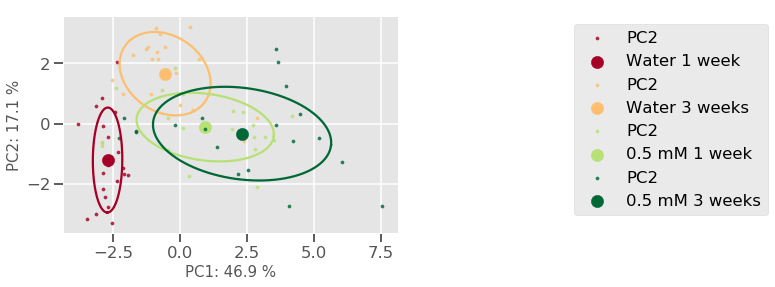

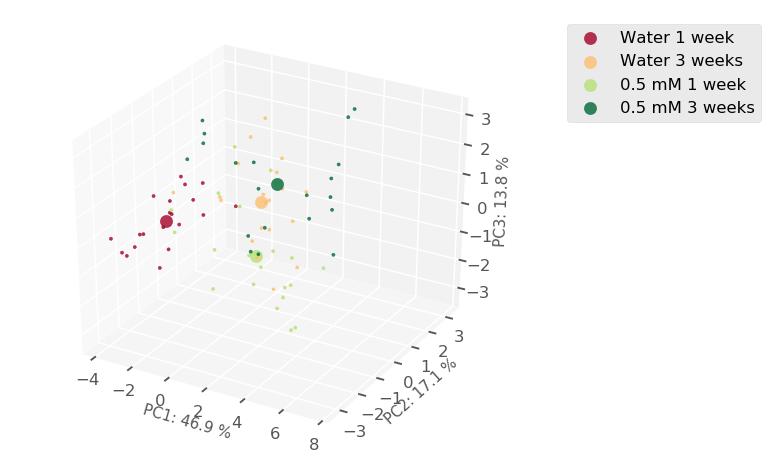

In [23]:
group_names_list = ['Group1','Goup2','Group3','Group4']      
plot_PC_groups_2D(group_names_list, explained_variance)
plot_PC_groups_3D(group_names_list, explained_variance)